In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [21]:
data=load_breast_cancer()
X=data.data
y=data.target

In [22]:
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=42)

In [24]:
dt = DecisionTreeClassifier()
lr = LogisticRegression(max_iter=1000)
svm = SVC(probability=True)

# Define the parameter grid for AdaBoost with different base estimators
param_grid = [
    {
        'estimator': [dt],
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    {
        'estimator': [lr],
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    {
        'estimator': [svm],
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    }
]
# AdaBoost model
ada = AdaBoostClassifier(random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search_ada = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_ada.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'estimator': [DecisionTreeClassifier()],
                          'learning_rate': [0.01, 0.1, 1.0],
                          'n_estimators': [50, 100, 200]},
                         {'estimator': [LogisticRegression(max_iter=1000)],
                          'learning_rate': [0.01, 0.1, 1.0],
                          'n_estimators': [50, 100, 200]},
                         {'estimator': [SVC(probability=True)],
                          'learning_rate': [0.01, 0.1, 1.0],
                          'n_estimators': [50, 100, 200]}],
             scoring='accuracy')

In [25]:
print("Best Params: ",grid_search_ada.best_params_)

Best Params:  {'estimator': LogisticRegression(max_iter=1000), 'learning_rate': 1.0, 'n_estimators': 50}


In [26]:
best_ada=grid_search_ada.best_estimator_
y_pred=best_ada.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("ROC AUC (AdaBoost):", roc_auc_score(y_test, best_ada.predict_proba(X_test)[:, 1]))

0.9824561403508771
[[42  1]
 [ 1 70]]
ROC AUC (AdaBoost): 0.9963969865705864


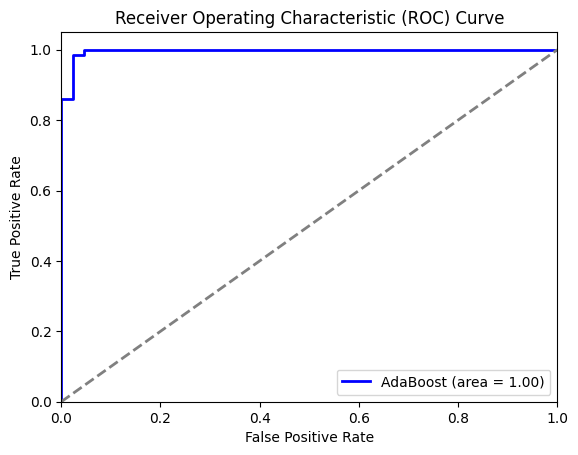

In [27]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_ada.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='AdaBoost (area = %0.2f)' % roc_auc_score(y_test, best_ada.predict_proba(X_test)[:, 1]))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [28]:
from sklearn.datasets import make_classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
X,y = make_classification(n_samples=1000,n_features = 20,n_informative=15,n_redundant=5,random_state=6)
model=AdaBoostClassifier()
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_score = cross_val_score(model, X,y,scoring='accuracy',cv=cv,n_jobs=-1, error_score='raise')
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R

In [29]:
print('Accuracy: %.3f (%.3f)' % (mean(n_score),std(n_score)))

Accuracy: 0.806 (0.041)
